# Instructions
This exam is **untimed** and will be due on Tuesday March 4th at 12:45.  You **do not** have to complete this exam in one contiguous block of time; feel free to stop and start as you please, but ensure that you do not come in contact with disallowed resources in between sessions.  While taking this exam, you are allowed to use:

- your book(s)
- your notes
- your previous codes from this class
- your completed code lessons
- lecture slides

and you **are not allowed to use**:

- the internet (if you need to look up python documentation, that's fine)
- another person
- another person's work



## Questions


### Question 1: (10 pts)

In the wave equation we define r to be $c \Delta t \over \Delta x $, and note that if it is bigger than a value of '1' it is unstable. Why does this instability exist?

In general for numerical solutions to partial differential equations, every unique differential value requires a minimum step size to accurately describe the solution. Since the wave equation depends both on spacial and time coordinates, this requires us to be strategic in choosing a $\Delta s$ value and a $\Delta t$ value. Since the wave equation is linear, and especially the fact that the wave equation is of second order in both time and space, it communicates that time steps and spacial steps can be equaivalent at most. The reason that $r$ can also be less than one is when we consider that $c$ can be smaller than 1 as well.

### Question 2 (10 pts) 

Why is fourth-order Runge Kutta more accurate than Euler or second-order Runge Kutta?

A simple answer would be because Euler method is Runge-Kutta of first order, second-order RK is two orders less than RK4. A more in depth reason is because of the idea of weighted averages on the slopes. Euler's method will simply follow the slope with a weight of 1 on the first slope it computes with step size $\Delta x$. This will accumulate an error of order $O(h)$. Error accumulation is relatively large compared to RK2. RK2 will have two evalutations of the function's slope and will assign a weight of 1/2 with each, thus getting more accurate to the true curve of the solution with error of order $O(h^2)$. RK4, on the other hand, will compute 4 evaluations of the function's slope and will weight those values to find the true slope with error only of order $O(h^4)$. Since $h$ is small, the greater power of $h$ in the order function, the more precise that method will be.

### Question 3 (10 pts)

Describe what is the differences between 'k space' and 'frequency space' in Fourier analysis.


In linear algebra, we learn that vectors can be written in terms of certain sets of basis vectors. Orthonormality creates a lot of interesting topics in quantum mechanics and in upper level math courses. Fourier analysis relies on this same principle, but uses sine and cosine function to rewrite a function in terms of them as opposed to an n-dimensional column vector representation. So, a k-space in Fourier analysis relates to the initial vector space of the original function $f(x)$. So, if I had a step function and I want to analyze it with Fourier analysis methods, my step function would initially exist within the k-space. The frequency space is where the transformed vector space exists, and my transformed step function would be rewritten in terms of sines and cosines whose frequencies would be represented by maxima in the $f(\omega)$ vs. frequency plot, and their amplitudes would tell me how much that frequency has influence on my step function. To demonstrate what I mean, I'll pretend I have a vector $\vec{v} = [x, y, z]^T$. If I obtain a new basis, such as {$\vec{u}_i$}, then my vector, rewritten in terms of this new basis, will in general have different components, and the component magnitudes would be given by the amplitude or projection of itself onto the corresponding basis vectors in creating my original vector $v$.

### Question 4 (20 pts) 

The Riemann Zeta function is defined as:
$$\begin{equation}
\zeta(p) = \sum_{n=1}^\infty n^{-p}
\end{equation}$$

   1. Use a loop to evaluate this function for $p = 0.5$ and $p = 1.5$. For which of these cases does the sum converge and for which does it diverge. (Watch out for infinite loops)
   2. Place your loop from part 1 into a function.  Then evaluate the function on a discrete grid of points for $1 < p\le 10$ and plot it.

In [103]:
import numpy as np

# Define the zeta function using a lambda and for loop to iterate _n times
ζ = lambda _p, _n: sum([1 / (n ** _p) for n in range(1, _n + 1)])

p0 = 0.5
p1 = 1.5

# To test for convergence, I will test a lot of different values of n to see if the number keeps changing significantly
n = list(range(100, 501))

for _n in n:
    if _n % 100 == 0:
        print(f"ζ(0.5) = {ζ(p0, _n)}, n = {_n}")

print()

for _n in n:
    if _n % 100 == 0:
        print(f"ζ(1.5) = {ζ(p1, _n)}, n = {_n}")

ζ(0.5) = 18.58960382478415, n = 100
ζ(0.5) = 26.85925734634338, n = 200
ζ(0.5) = 33.20952113727926, n = 300
ζ(0.5) = 38.56464028285909, n = 400
ζ(0.5) = 43.28336199418217, n = 500

ζ(1.5) = 2.412874098703719, n = 100
ζ(1.5) = 2.4711305481734134, n = 200
ζ(1.5) = 2.4970014397050226, n = 300
ζ(1.5) = 2.5124378096230244, n = 400
ζ(1.5) = 2.522977328584379, n = 500


Clearly, $p = 0.5$ case is not going to be valid for a convergent solution. So, in general, $ζ(p)$ should have $p > 1$ in order to converge. An interesting fact is that the sum $\sum_{n=1}^{\infty} \frac{1}{n}$ does not converge.

#### Part 2

Now, I bring the operation into a function which was just completed and I plot different values of $p$ ranging from 1 (not inclusive) to 10 (inclusive) on integral steps.

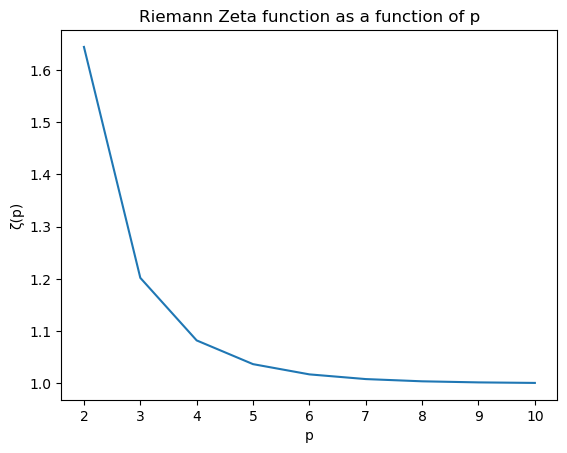

In [104]:
import matplotlib.pyplot as plt

p = list(range(2, 11))
n = 1000

# Since ζ(p) is already a defined function, I will go ahead and produce a list of outputs and plot them against p values
_ζ = [
    ζ(_p, n) for _p in p
]

plt.title("Riemann Zeta function as a function of p")
plt.xlabel("p")
plt.ylabel("ζ(p)")
plt.plot(p, _ζ)
plt.show()

### Question 5 (25 pts)

You are firing a cannon shell from a vehicle that is moving away from its target at a rate of $30$ m/s.  At the moment you fire the shell, the target is $10$ km away(horizontally) and $1000$ meters higher in elevation.  The exit speed of the shell is $700$ m/s.  You cannot neglect air resistance and you should use the adiabatic approximation for the variation in air density with altitude. (equation (2.24) in the book.) 

   1. Use fourth-order Runge-Kutta to compute the shell's trajectory.
   2. Using a loop, determine what the launch angle should be so that  the shell strikes within 10 meters of the target.
    
    
You may use the following variable values:
    
$$
g = 9.8 \mathrm{~m/s}^2 \hspace{1in} \rho_0 = 1.29 \mathrm{~kg/m}^3 \\
T_0 = 320 \mathrm{~K} \alpha = 2.5 A = 0.007 \mathrm{~m}^2\\
m = 50 \mathrm{~kg} C = 0.5 a =6.5 \times 10^{-3} \text{~K/m} $$



278.2659216032806
231.53317278944235
185.42341316125476
139.23219670443865
92.95950740061967
45.91934187515377
-0.5126196217299387


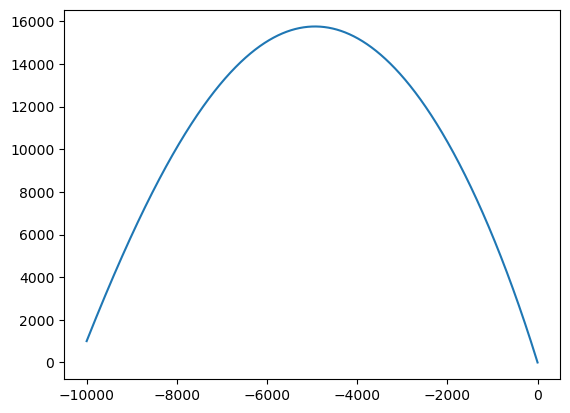

First valid angle: 1.3418 radians
-410.7738694672734
-374.8343210611334
-338.9633144350776
-303.16071101593053
-272.0799299313226
-236.4070914364714
-200.80225996694952
-165.26529654127233
-129.79606210371534
-94.39441753230429
-59.060223646935334
-28.40162858156713
6.804569270166405


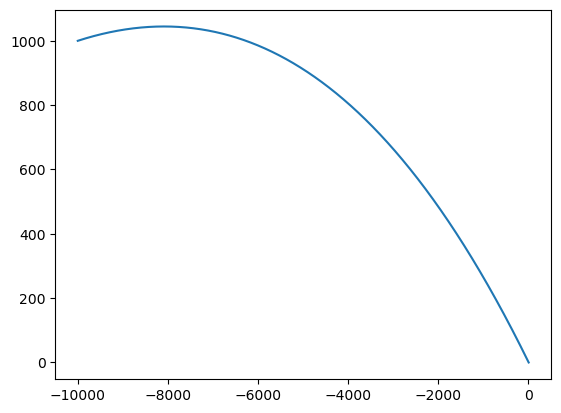

Second valid angle: 0.0424 radians


In [102]:
# Recall Eq. (2.24) where ρ = ρ0 * (1 - a * y / T0) ^ α
import numpy as np
import matplotlib.pyplot as plt

g = 9.8
ρ0 = 1.29
T0 = 320.0
α = 2.5
A = 7.0e-3
m = 50.0
Cd = 0.5
a = 6.5e-3

h = 1e-2

# Here, I write the forms of the vectors as to not get too lost in this :))
# r = [x, y, vx, vy]
# f(r, t) = dr/dt = [vx, vy, ax, ay] -> this is special as it has no t dependence, but I will keep it there out of habit

f = lambda _r, _t: np.array([
    _r[2],
    _r[3],
    # Since ax has no gravitational dependence, g is not a term here. Since F_drag has ρ in its definition,
    # the term is squared, but ρ0 cancels with Eq. (2.25) so we get
    # ρ0 / ρ0 * (1 - a * y / T0) ^ α * ρ0 * (1 - a * y / T0) ^ α = ρ0 * (1 - a * y / T0) ^ (2α)
    -ρ0 * (1 - a * _r[1] / T0) ** (2 * α) * 1 / 2 * Cd * A * np.linalg.norm(_r[2] + _r[3]) * _r[2] / m,
    # Also, v^2 * v_hat can be simplified to |v| * [vx, vy, vz] instead of |v|^2 * [vx, vy, vz] / |v| to get the components
    -ρ0 * (1 - a * _r[1] / T0) ** (2 * α) * 1 / 2 * Cd * A * np.linalg.norm(_r[2] + _r[3]) * _r[3] / m - g
])

# Νow that f(r, t) is defined, I can work on the development of an RK4 function to solve the differential equation
def RK4(_f, _h, _r, _t):
    k1 = _h * _f(_r, _t)
    k2 = _h * _f(_r + k1 / 2, _t + _h / 2)
    k3 = _h * _f(_r + k2 / 2, _t + _h / 2)
    k4 = _h * _f(_r + k3, _t + _h)
    return _r + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# Recall, the initial conditions will be set as I create my r vector. My position will be relative to the target, so x is negative and y is positive
# and v is both to the right (+x) and pointed upward (+y)
θ = 3.1415926572 / 2.35 # My initial guess for launch angle
# A small step size to increment theta each time to improve the approximation
dθ = 1e-3

x0 = -1.0e4
y0 = 1.0e3
vx0 = lambda _θ: 7.0e2 * np.cos(_θ) - 3.0e1
vy0 = lambda _θ: 7.0e2 * np.sin(_θ)

# Make lists to keep track of x and y positions through space
t = 0.0

epsilon = 10.0

r = np.array([
    x0,
    y0,
    vx0(θ),
    vy0(θ)
], float)

while abs(r[0]) > epsilon:
    r = np.array([
        x0,
        y0,
        vx0(θ),
        vy0(θ)
    ], float)

    x = [r[0]]
    y = [r[1]]

    while r[1] >= 0.0:
        # Let RK4 forward step the position and velocity vector
        r = RK4(f, h, r, t)
        x.append(r[0])
        y.append(r[1])
        
    print(r[0])
    
    if r[0] > 0:
        θ += dθ
    else:
        θ -= dθ

plt.plot(x, y)
plt.show()
print(f"First valid angle: {θ:.4f} radians")

# Since there is another solution, technically, and although it may not be physical, I'd like to seek out that solution as well.
θ = 3.1415926572 / 100

r = np.array([
    x0,
    y0,
    vx0(θ),
    vy0(θ)
], float)

while abs(r[0]) > epsilon:
    r = np.array([
        x0,
        y0,
        vx0(θ),
        vy0(θ)
    ], float)

    x = [r[0]]
    y = [r[1]]

    while r[1] >= 0.0:
        # Let RK4 forward step the position and velocity vector
        r = RK4(f, h, r, t)
        x.append(r[0])
        y.append(r[1])
        
    print(r[0])
    
    if r[0] > 0:
        θ -= dθ
    else:
        θ += dθ

plt.plot(x, y)
plt.show()
print(f"Second valid angle: {θ:.4f} radians")

As it is shown above, the RK4 method clearly handles the differential equation well and there exist 2 valid angle solutions to the problem (likely, depending on the real situation, only one would potentially be valid) given the initial conditions and requirements. Like in the text, the incorporation of air drag into the system causes a skew on the parabolic path and looks as expected. The Runge Kutta 4 method is strightforward and was quite simple to program. Had to make sure that my drag was always inducing an acceleration on the mass in the negative direction to its velocity, otherwise the solution will not converge and the while loops will never have a reason to stop. Again, valid solutions to $\theta$ are

$$\theta \approx 1.34, 0.042 \hspace{0.1 in} \text{rad}$$

#### Comments on the Validity of the Solutions

The smaller angle would not be valid if a certain wall had to be cleared for example, and the larger angle would not be valid if there were specific height requirements for the path of the projectile. There are more potential situations where only one is valid, and there exist some where neither would be valid. 




### Question 6 (25 pts)

Please choose **one** question from the options below:

#### Option 1:

A Faraday's cage is a conducting enclosure meant to shield the interior (and any occupants) from strong electric fields present in the region.  In this problem, you will use the SOR algorithm to study electrostatic shielding.  Choose a simulation region with sizes: $-0.1 < x < 0.1$ and $0 < y < 0.4$ (**note that dx and dy are not equal in this case!!!**) and set the potential at the boundaries to be: $V(-0.1,y) = -1$, $V(0.1,y) = 1$, $V(x,0) = V(x,0.4) = 0$.  To simulating the shielding, ground some points ($V = 0$) in the interior of your grid to simulate the cage.  I'll let you choose the exact dimensions of your grounded cage. Allow some holes in your cage so you can see how fields leak in.

   1. You must use SOR
   2. You must plot the following:
        - A surface plot of the potential.
        - A countour plot of the potential.
        - A vector field plot of the electric field.

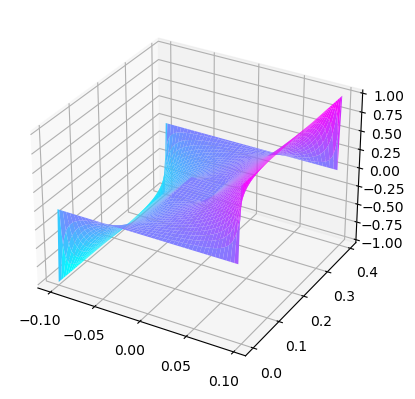

/var/folders/wt/m3rtv90d1xvfs20h6qn_kfjc0000gn/T/ipykernel_78785/2196606575.py:77: UserWarning: The following kwargs were not used by contour: 'colormap'
  plt.contourf(X, Y, V, colormap = 'cool')


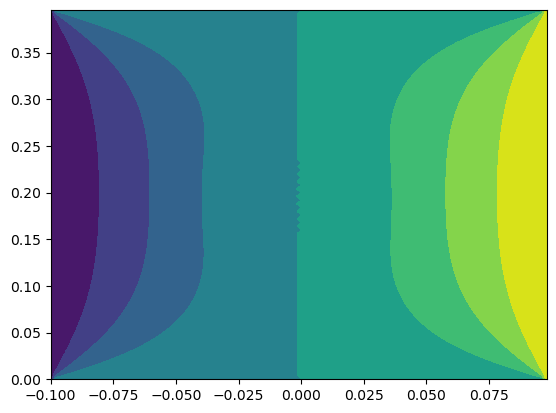

In [25]:
# Relaxation method to find the voltage as a function of space
import numpy as np

# This function simply resets the boundaries only, no adjustments to important values
def resetBoundaries(V):
    # I pass through the rows, calling the direction through the rows -x, and setting
    # the value equal to +/- 1, according to my boundary condition
    for index1, x in zip(range(0, 100, 1), range(-50, 50, 1)):
        V[index1][0] = -1.0
        V[index1][-1] = 1.0
    
    # I likewise move across all of the y values, aside from the first and last,
    # and set them to zero. The reason for skipping first and last column index
    # is because I'm letting the boundary in the first and last columns be defined
    # by +/- 1, according to above
    for index2, y in zip(range(1, 99, 1), range(1, 99, 1)):
        V[0][index2] = 0
        V[-1][index2] = 0
    
    # And finally, I set V = 0 in the inner 20x20 square where the Faraday cage is located
    # and I skip to every other opening to allow for leakage of field into the cage
    # to see the effects
    for index3 in range(40, 60, 2):
        for index4 in range(40, 60, 2):
            V[index3][index4] = 0.0
    
    return V

# And I create another function to average out the region
def averageRegion(V, loops = 10_000):
    # We need to make a copy of V in order to have a stationary array for reference.
    # The array V will be modified after 1 iteration in this for loop
    V_stationary = np.copy(V)
    
    # Average over the number of loops specified
    for _ in range(loops):
        # Iterate through the rows and columns being sure to avoid the first and
        # last row indeces and the first and last column indeces
        for index1, x in zip(range(1, 99, 1), range(-49, 49, 1)):
            for index2, y in zip(range(1, 99, 1), range(1, 99, 1)):
                # Successively average the region by adding the 4 adjacent values
                # and the dividing the sum by 4
                V[index1, index2] = 1 / 4 * (V_stationary[index1 - 1, index2] + V_stationary[index1 + 1, index2] \
                                             + V_stationary[index1, index2 - 1] + V_stationary[index1, index2 + 1])
        
        # After a loop, reset the boundaries for V and then update V_stationary to become the new V
        # Also, since V is an array, it is passed to this function by reference
        # and thus will be updated without needing to return the values. So I simply call the function and pass to it V
        resetBoundaries(V)
        V_stationary = np.copy(V)
    
    # Reset the boundaries once more on exit
    resetBoundaries(V)
    
    return V

# Then, I made a grid of the voltage initially
V = np.zeros((100, 100), dtype = float)
V = resetBoundaries(V)

# Additionally, create the 2d meshgrid for matplotlib to map position the voltage values
# onto the plot
X, Y = np.meshgrid(np.array(range(-50, 50, 1), dtype = float), np.array(range(0, 100, 1), dtype = float))
X /= 500
Y /= 250

V = averageRegion(V, 20_000)

# Finally, plot the solution. First is surface plot, and then contour plot.
# Lastly, I compute the negative directional derivatives (gradient) of the voltage
# to calculate my Electric vector field
fig1, ax1 = plt.subplots(subplot_kw = {"projection": "3d"})

surf = ax1.plot_surface(X = X, Y = Y, Z = V, cmap = 'cool')
plt.show(fig1)

plt.contourf(X, Y, V, colormap = 'cool')
plt.show()

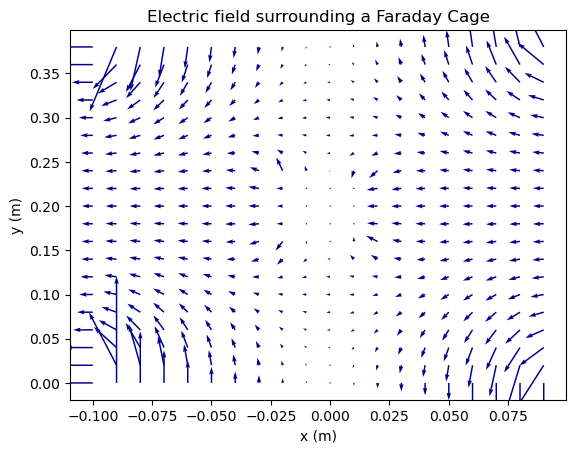

In [105]:
# Now, to find the gradient of the field, I use a simple derivative function where -grad(V) = -[dV/dx, dV/dy] and dV/dx = -(V(x + dx) - V(x)) / dx
# As you can see, the voltage is not a function of Z to keep the visualization simple. Thus, the electric field only has an x and a y component
dx = 0.2 / 100
dy = 0.4 / 100

def grad(V):
    # To build a quiver plot, they need to know the location of the vector as well as its components
    # but the location is exactly where the X, Y meshgrid lines up. So, I have to find the vector
    # components in the same order such that the coordinates match the locations of X, Y
    _U = np.zeros((100, 100))
    _V = np.zeros((100, 100))
    
    # The derivatives will be computed using center difference method in the middle of the field
    # and the ends will be computed with forward/backward difference where applicable.
    for index1, x in zip(range(1, 99), range(-49, 49)):
        for index2, y in zip(range(1, 99), range(1, 99)):
            dVdx = -(V[index1 + 1][index2] - V[index1 - 1][index2]) / (2 * dx)
            dVdy = -(V[index1][index2 + 1] - V[index1][index2 - 1]) / (2 * dy)
            _U[index1][index2] = dVdx
            _V[index1][index2] = dVdy
    
    # Edge derivates - left
    for index1 in range(1, 99):
        # Center diff still works for x, but not for y
        dVdx = -(V[index1 + 1][0] - V[index1 - 1][0]) / (2 * dx)
        dVdy = -(V[index1][1] - V[index1][0]) / dy
        _U[index1][0] = dVdx
        _V[index1][0] = dVdy
    
    # Edge derivates - right
    for index1 in range(1, 99):
        # Center diff still works for x, but not for y
        dVdx = -(V[index1 + 1][-1] - V[index1 - 1][-1]) / (2 * dx)
        dVdy = -(V[index1][-1] - V[index1][-2]) / dy
        _U[index1][-1] = dVdx
        _V[index1][-1] = dVdy
    
    # Edge derivates - top
    for index2 in range(1, 99):
        # Center diff works for y this time, but not for x
        dVdx = -(V[1][index2] - V[0][index2]) / dx
        dVdy = -(V[0][index2 + 1] - V[0][index2 - 1]) / (2 * dy)
        _U[0][index2] = dVdx
        _V[0][index2] = dVdy
        
    # Edge derivates - bottom
    for index2 in range(1, 99):
        # Center diff works for y this time, but not for x
        dVdx = -(V[-1][index2] - V[-2][index2]) / dx
        dVdy = -(V[-1][index2 + 1] - V[-1][index2 - 1]) / (2 * dy)
        _U[-1][index2] = dVdx
        _V[-1][index2] = dVdy
    
    # Corner derivatives in the array - top left
    dVdx = -(V[1][0] - V[0][0]) / dx
    dVdy = -(V[0][1] - V[0][0]) / dy
    _U[0][0] = dVdx
    _V[0][0] = dVdy
    
    # Corner derivatives in the array - top right
    dVdx = -(V[1][-1] - V[0][-1]) / dx
    dVdy = -(V[0][-1] - V[0][-2]) / dy
    _U[0][-1] = dVdx
    _V[0][-1] = dVdy
    
    # Corner derivatives in the array - bottom left
    dVdx = -(V[-1][0] - V[-2][0]) / dx
    dVdy = -(V[-1][1] - V[-1][0]) / dy
    _U[-1][0] = dVdx
    _V[-1][0] = dVdy
    
    # Corner derivatives in the array - bottom right
    dVdx = -(V[-1][-1] - V[-2][-1]) / dx
    dVdy = -(V[-1][-1] - V[-1][-2]) / dy
    _U[-1][-1] = dVdx
    _V[-1][-1] = dVdy
    
    return _V, _U

E = grad(V)
skips = 5

X, Y = np.meshgrid(np.array(range(-50, 50, 1), dtype = float), np.array(range(0, 100, 1), dtype = float))
X /= 500
Y /= 250

plt.title("Electric field surrounding a Faraday Cage")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
# Plotting every point gets VERY messy VERY quick, so I skip over some of the in-between points to clean up the output
plt.quiver(X[::skips, ::skips], Y[::skips, ::skips], E[0][::skips, ::skips], E[1][::skips, ::skips], color = 'darkblue')
plt.show()

#### Option 2: 

The undamped, undriven wave equation is given by:
$$
\frac{\partial^2 y}{\partial t^2} = c^2 \frac{\partial^2 y}{\partial x^2}  \qquad  (1)
$$
where $c = \sqrt{T\over \mu}$. We can add a stiffness factor into the
wave equation (think about the difference between a vibrating string
vs. a vibrating wire) by adding a fourth order spatial derivative, so the wave
equation looks like this:
$$
\frac{\partial^2 y}{\partial t^2} = c^2 \left(\frac{\partial^2
    y}{\partial x^2} - \epsilon L^2\frac{\partial^4 y}{\partial x^4}\right)  \qquad  (2)
$$
where $\epsilon$ is a stiffness parameter and $L$ is the length of the string.
The fourth derivative can be written in discrete form like this:
$$
\frac{\partial^4 y}{\partial x^4} = \frac{y_{j + 2}^n - 4 y_{j +
    1}^n + 6 y_j^n - 4 y_{j -1}^n + y_{j-2}^n}{h^4}    \qquad  (3)
$$

(a) Use Equation (3) and the other formulas for discrete derivatives that you are already familiar with to discretize equation(2). Then solve for $y_j^{n+1}$

(b) Use the discretization from part (a) to write a python program to animate waves on the horizontal string, fixed at both ends.  Use the gaussian initial displacement:

$$
y(x,0) = e^{-\frac{160 (x - {L \over 2})^2}{L^2}}   \qquad  (4)
$$

with zero initial velocity and the parameter values:
$T = 127\, N$, $\mu = 0.003 \,kg/m$, and $\epsilon = 1\times 10^{-5}$

(c) Perform a Fourier Analysis of the frequencies that form from this initialization and note the fundamental and first three overtones.

In [1]:

from IPython.display import Image
  
# get the image
Image(url="stiffness.png", width=300, height=300)


Here are some tips/hints that may help.

1. Notice that equation (3) steps forward and
  backward $\textbf{two spatial grid points}$. We've never had to deal
  with this before.  This means that the equation from part (b) cannot
  be used to update the first $\text{two}$ grid points or the last
  $\textbf{two}$ grid points (instead of just the first and last like
  we're used to).  To handle this challenge, consider using a
  $\textbf{cell-edge}$ grid (not cell-centered) with ghost points.  One
  ghost point is one step to the left of $x = 0$ and the other ghost
  point is one step to the right of $x = L$ (see the figure).  To
  enforce fixed boundary conditions, you can update the ghost points
  by simply mirroring them across $x = 0$ and $x = L$, like this:
$$
y[0] = - y[2]  \qquad \qquad      y[-1] = -y[-3]
$$
(If you need to come talk to me about this please feel free to.)
2. Normally you would need to derive an expression for $\verb!yOld!$ to get the
  animation started.  However, since the string is not moving
  initially, just set $\verb!yOld!$ to be equal to equation
  (4) initially.
3. There will be a new Courant condition for this situation and
  it's much more drastic than you're used to (because of the fourth
  order derivative).  Don't be afraid to drop $\tau$ drastically and
  adjust your animation speed accordingly and don't run it too long.
4. To test the accuracy of your simulation, play with different
  values of $\epsilon$ and see if the resulting vibration makes good
  conceptual sense.  Large values of $\epsilon$ correspond to stiffer
  materials.  Note that changing $\epsilon$ also changes your Courant 
  condition and your frequencies from Fourier analysis. 
  (I ran mine from $1\times 10^{-2}$ to $1\times 10^{-6}$ )
